# **ETL/EDA** output_steam

Aquí mostramos los pasos que hemos seguido para la limpieza, tratamiento y exploración de los datos, para el dataset OUTPUT_STEAM_GAMES el resultado de este procedimiento es 1 archivo tratado, que luego es cargado y re-procesado posteriormente en la construcción de las soluciones a los problemas planteados.

Cargamos el primer data set: ouput_steam_games.json

In [45]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from wordcloud import WordCloud

In [ ]:
# El siguiente codigo nos permite detectar encoding
import chardet

file_path = 'output_steam_games.json'

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
confidence = result['confidence']

print(f"Detected encoding: {encoding} (Confidence: {confidence:.2f})")

Detected encoding: ascii (Confidence: 1.00)


In [2]:

dfout = pd.read_json('output_steam_games.json', lines=True, encoding='ascii')
dfout

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"


## Limpieza de los datos

### Exploración

Manipulamos los datos revisando cada columna y ordenandola se detecta lo siguiente:
- Se detectaron caracteres especiales en columna publisher
- Se detectaron caracteres especiales en columna appname
- Se detectaron caracteres especiales en columna release date 
- Se detectaron caracteres especiales en columna publisher

In [3]:
dfout["release_date"].sort_values( inplace=False, ascending=False)

101738     预热群52756441
100957     Январь 2018
98585             soon
101318    early access
120268     coming soon
              ...     
120387            None
120394            None
120395            None
120398            None
120444            None
Name: release_date, Length: 120445, dtype: object

Al revisar la información del dataframe verificamos que existe mucha disparidad en la información de cada columna, es decir muchas columnas contienen valores nulos

In [4]:
dfout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


Contabilizamos valores NaN y vacíos

In [9]:
nan_counts = dfout.isna().sum()

nan_counts

publisher       96362
genres          91593
app_name        88312
title           90360
url             88310
release_date    90377
tags            88473
reviews_url     88312
specs           88980
price           89687
early_access    88310
id              88312
developer       91609
dtype: int64

In [6]:
empty_counts = dfout.applymap(lambda x: x == '').sum()
empty_counts

publisher       0
genres          0
app_name        0
title           0
url             0
release_date    0
tags            0
reviews_url     0
specs           0
price           0
early_access    0
id              0
developer       0
dtype: int64

Contabilizamos valores repetidos de ID

In [10]:
repeated_counts = dfout['id'].value_counts()
repeated_counts



612880.0    2
761140.0    1
530200.0    1
518690.0    1
513460.0    1
           ..
676060.0    1
494160.0    1
215280.0    1
667090.0    1
681550.0    1
Name: id, Length: 32132, dtype: int64

In [11]:
dfout.query('id == 612880.0')

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
102204,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,"[Single-player, Steam Achievements, Full contr...",59.99,0.0,612880.0,Machine Games
102883,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,http://store.steampowered.com/app/612880/Wolfe...,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...",http://steamcommunity.com/app/612880/reviews/?...,"[Single-player, Steam Achievements, Full contr...",59.99,0.0,612880.0,Machine Games


Eliminamos filas repetidas considerando las columnas 'publisher', 'app_name', 'title', 'release_date', 'reviews_url', 'price', 'early_access', 'id', 'developer'

In [12]:
dfoutput = dfout.drop_duplicates(subset=['publisher', 'app_name', 'title', 'release_date', 'reviews_url', 'price', 'early_access', 'id', 'developer'])
dfoutput.drop(0, inplace=True)
dfoutput.reset_index(drop=True, inplace=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_5576\1375655948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfoutput.drop(0, inplace=True)


Verificamos Id vacíos y los eliminamos

In [13]:
dfoutput["id"].sort_values( inplace=False, ascending=True)

32105         10.0
32102         20.0
32113         30.0
32107         40.0
32103         50.0
           ...    
30321    2028062.0
30523    2028103.0
1425     2028850.0
74             NaN
30960          NaN
Name: id, Length: 32134, dtype: float64

In [14]:
dfoutput.dropna(subset=['id'], inplace=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_5576\4086280666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfoutput.dropna(subset=['id'], inplace=True)


Revisamos la columna Release_date, encontramos valores vacios y sin año.

In [15]:
dfoutput["release_date"].sort_values( inplace=False, ascending=True)

13618                                           """Soon"""
13614    0̵1̴0̵0̶1̷0̶0̵0̴ ̴0̶0̶1̶1̶0̷0̶1̵1̴ ̸0̶0̶1̶1̵0̶...
10483                                              14 July
32081                                           15.01.2018
14846                                           1970-07-15
                               ...                        
32076                                                 None
32083                                                 None
32084                                                 None
32087                                                 None
32133                                                 None
Name: release_date, Length: 32132, dtype: object

In [16]:
nan_counts = dfoutput.isna().sum()
nan_counts

publisher       8051
genres          3282
app_name           1
title           2049
url                0
release_date    2066
tags             162
reviews_url        0
specs            669
price           1377
early_access       0
id                 0
developer       3298
dtype: int64

Convertimos la columna id a str

In [17]:
# Convertir la columna "id" de float a int
dfoutput["id"] = dfoutput["id"].astype(int)

# Convertir la columna "id" de int a str
dfoutput["id"] = dfoutput["id"].astype(str)

C:\Users\Owner\AppData\Local\Temp\ipykernel_5576\4267712941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfoutput["id"] = dfoutput["id"].astype(int)
C:\Users\Owner\AppData\Local\Temp\ipykernel_5576\4267712941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfoutput["id"] = dfoutput["id"].astype(str)


In [18]:
dfoutput.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140,Kotoshiro
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980,Secret Level SRL
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290,Poolians.com
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400,彼岸领域
4,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570,None


## Tratamiento de la columna 'genres'

Para el tratamiento de los generos creamos una lista unica con los generos que luego tomaremos de la columna Tags

In [19]:
import numpy as np
genres = dfoutput['genres'].explode().unique()
genres_list=genres.tolist()

In [20]:
# Iteramos atraves de cada fila
for index, row in dfoutput.iterrows():
    tags = row['tags']
    genres = row['genres']
    
    
    if not genres and tags:
        matching_genres = [genre for genre in genres_list if genre in tags]
        dfoutput.at[index, 'genres'] = matching_genres

In [21]:
dfoutput

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140,Kotoshiro
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980,Secret Level SRL
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290,Poolians.com
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400,彼岸领域
4,None,"[Action, Casual, Indie, Sports]",Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32129,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640,"Nikita ""Ghost_RUS"""
32130,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530,Sacada
32131,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660,Laush Dmitriy Sergeevich
32132,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870,"xropi,stev3ns"


## Tratamiento de columna 'year'

En este paso vamos a extraer solo los años de las fechas debido a que solo se nos pide trabajar con años.

In [22]:
dfoutput['year'] = dfoutput['release_date'].str.extract('(\d{4})', expand=False)
dfoutput['year'] = dfoutput['year'].astype('str')
dfoutput['year']=dfoutput['year'].replace('nan', pd.NA) #al convertir los años a str tuvimos que volver a declarar los valores nulos como NaN


C:\Users\Owner\AppData\Local\Temp\ipykernel_5576\812438373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfoutput['year'] = dfoutput['release_date'].str.extract('(\d{4})', expand=False)
C:\Users\Owner\AppData\Local\Temp\ipykernel_5576\812438373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfoutput['year'] = dfoutput['year'].astype('str')
C:\Users\Owner\AppData\Local\Temp\ipykernel_5576\812438373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [23]:
dfoutput.year.value_counts()

2017    9594
2016    6943
2015    4952
2014    2844
None    2066
2013    1552
2012    1192
2011     590
2010     442
2009     341
2008     213
2007     167
2018     159
2006     155
2005     102
2003      84
2004      79
2001      69
1998      61
1999      55
2002      50
1997      42
2000      40
1996      39
1994      36
1993      34
1995      33
1991      16
1992      15
1990      12
1989      10
1987       9
1988       7
1984       4
1983       4
2019       4
1985       3
1982       3
1981       3
1970       2
1986       1
2021       1
5275       1
1975       1
1980       1
Name: year, dtype: int64

Vemos que aun persisten valores 'None' de manera que vamos a transformarlos en NaN

In [24]:
dfoutput['year'] = dfoutput['year'].mask(dfoutput['year'] == 'None', pd.NA)

C:\Users\Owner\AppData\Local\Temp\ipykernel_5576\1086873353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfoutput['year'] = dfoutput['year'].mask(dfoutput['year'] == 'None', pd.NA)


Verificamos que ya no esten presentes

In [25]:
dfoutput.year.value_counts()

2017    9594
2016    6943
2015    4952
2014    2844
2013    1552
2012    1192
2011     590
2010     442
2009     341
2008     213
2007     167
2018     159
2006     155
2005     102
2003      84
2004      79
2001      69
1998      61
1999      55
2002      50
1997      42
2000      40
1996      39
1994      36
1993      34
1995      33
1991      16
1992      15
1990      12
1989      10
1987       9
1988       7
2019       4
1984       4
1983       4
1982       3
1985       3
1981       3
1970       2
1986       1
2021       1
5275       1
1975       1
1980       1
Name: year, dtype: int64

Revisamos outliers

In [26]:
dfoutput["year"].sort_values( inplace=False, ascending=False)

13428    5275
13140    2021
14432    2019
21367    2019
14328    2019
         ... 
32083    <NA>
32084    <NA>
32086    <NA>
32087    <NA>
32133    <NA>
Name: year, Length: 32132, dtype: object

Con el histograma podemos apreciar visualmente que existen años que no tienen mucha relevancia (entre 1970 y 1990) para el calculo sin embargo requeriria mayor investigacion de los datos para verificar la veracidad de los mismos además vemos un año erroneo 5275

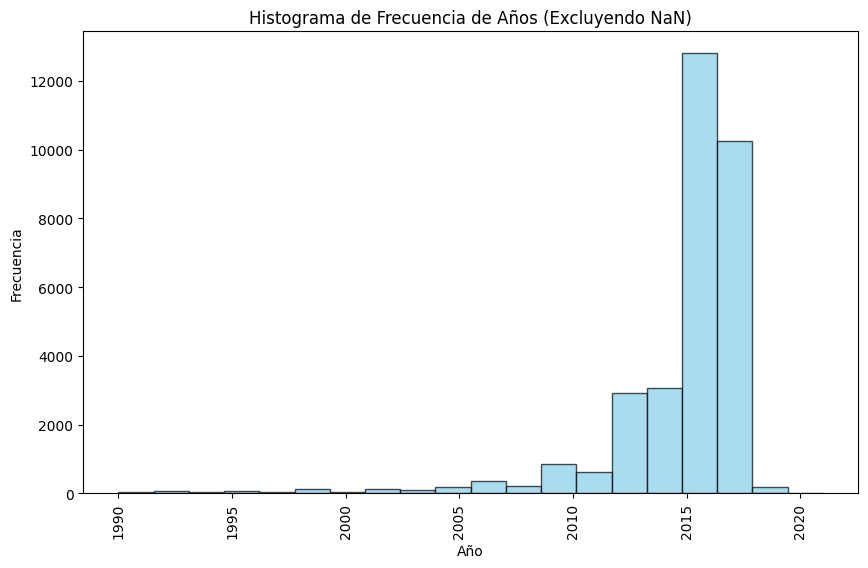

In [36]:
# Ordenar la Serie de años
años_ordenados = dfoutput['year'].dropna().sort_values()

# Crear un histograma excluyendo los NaN y actualizar la columna en el DataFrame original
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según tu preferencia

# Utilizar plt.hist para crear el histograma
plt.hist(años_ordenados, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencia de Años (Excluyendo NaN)')

# Rotar los años en el eje x
plt.xticks(rotation=90)

# Mostrar el histograma
plt.show()

In [37]:
filtered_items = dfoutput[dfoutput['year'] == '5275']
filtered_items

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer,year


Eliminamos el outlier superior

In [29]:
dfoutput = dfoutput.drop(13428)

Eliminamos los años de 1970 a 1990

In [30]:
dfoutput['year'] = pd.to_numeric(dfoutput['year'], errors='coerce')

# Create a boolean mask for the condition
mask = (dfoutput['year'] >= 1970) & (dfoutput['year'] <= 1989)

# Use the mask to filter out the rows
dfoutput = dfoutput[~mask]

Contabilizamos los nulos para determinar su peso en el total de datos

In [31]:
total_filas = len(dfoutput)
nan_count = dfoutput['year'].isna().sum()
non_nan_count = dfoutput['year'].count()

print(f'Total de filas: {total_filas}')
print(f'Cantidad de NaN en la columna "year": {nan_count}')
print(f'Cantidad de valores no nulos en la columna "year": {non_nan_count}')

Total de filas: 32083
Cantidad de NaN en la columna "year": 2167
Cantidad de valores no nulos en la columna "year": 29916


Vamos a reemplazar los valores nulos con la probabilidad de cada año segun su frecuencia

In [32]:
conteo_series = dfoutput.year.value_counts()

# Convertir la Serie a DataFrame
df_resultado = pd.DataFrame(conteo_series.reset_index())
df_resultado.columns = ['Año', 'Conteo']  # Renombrar las columnas si es necesario

# Ordenar por el año si lo deseas
conteo_df = df_resultado.sort_values(by='Año')

# Restablecer los índices si lo deseas
conteo_df = df_resultado.reset_index(drop=True)
conteo_df

,Año,Conteo
0,2017.0,9594
1,2016.0,6943
2,2015.0,4952
3,2014.0,2844
4,2013.0,1552
5,2012.0,1192
6,2011.0,590
7,2010.0,442
8,2009.0,341
9,2008.0,213


In [33]:
# Calcular la probabilidad de cada año
conteo_df['Probabilidad'] = conteo_df['Conteo'] / conteo_df['Conteo'].sum()

# Generar un año aleatorio en función de las probabilidades
años_posibles = conteo_df['Año'].tolist()
probabilidades = conteo_df['Probabilidad'].tolist()

# Obtener índices de las filas con años NaN
indices_nan = dfoutput['year'].isna()

# Asignar años basados en las probabilidades a las filas con años NaN
dfoutput.loc[indices_nan, 'year'] = np.random.choice(años_posibles, size=indices_nan.sum(), p=probabilidades)

Verificamos que no hay valores nulos en year.

In [38]:
nan_counts = dfoutput.isna().sum()
nan_counts

publisher       8024
genres           138
app_name           1
title           2049
url                0
release_date    2066
tags             162
reviews_url        0
specs            666
price           1376
early_access       0
id                 0
developer       3271
year               0
dtype: int64

In [35]:
dfoutput['year'] = dfoutput['year'].astype(int)

## Tratamiento a la columna 'developer' y 'title'

Vamos a calcular la **similitud** entre las columnas app_name y title para poder reemplazar valores entre si

In [39]:
similitud_string = dfoutput.apply(lambda row: fuzz.ratio(row['app_name'], row['title']), axis=1)
print(f"Similitud promedio entre strings: {similitud_string.mean()}")

Similitud promedio entre strings: 93.51544431630458


In [40]:
dfoutput['title'].fillna(dfoutput['app_name'], inplace=True)

Del mismo modo para publisher y developer, notamos que la similitud no es alta, sin embargo, consideramos que es una parte relacionada y muchas veces el nombre del developer está incluido en el publisher, para efectos de este trabajo la vamos a considerar.

In [41]:
similitud_string = dfoutput.apply(lambda row: fuzz.ratio(row['publisher'], row['developer']), axis=1)
print(f"Similitud promedio entre strings: {similitud_string.mean()}")

Similitud promedio entre strings: 51.220241249259736


In [42]:
dfoutput['developer'].fillna(dfoutput['publisher'], inplace=True)

In [43]:
nan_counts = dfoutput.isna().sum()
nan_counts

publisher       8024
genres           138
app_name           1
title              1
url                0
release_date    2066
tags             162
reviews_url        0
specs            666
price           1376
early_access       0
id                 0
developer       3206
year               0
dtype: int64

Vemos que la columna 'developer' no pudo completarse de forma significativa lo que sí ocurrió con 'title', en este caso vamos a tener que manejar los datos faltantes de acuerdo a la función que se nos solicite.


Como parte del proceso de exploración y para tener una idea general de la frecuencia con que aparecen los titulos realizamos una nube de palabras.

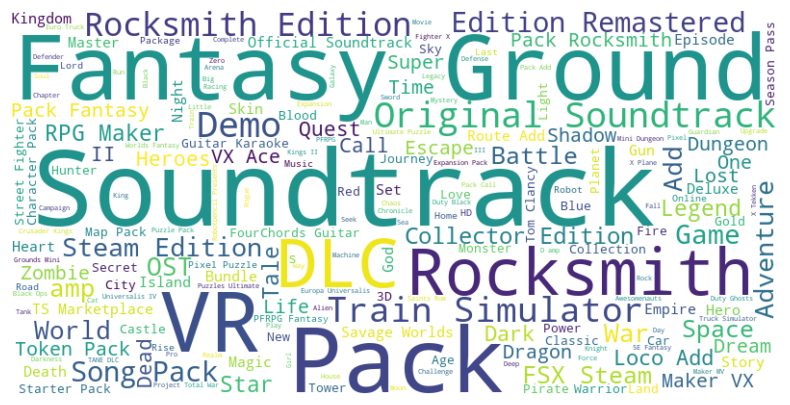

In [49]:
# Filtramos los valores None en la columna 'titles'.
filtered_titles = dfoutput['title'].dropna()

# Instancia de WordCloud con las opciones deseadas.
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_titles))

# Muestra la nube de palabras utilizando matplotlib.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Realizamos el mismo trabajo para los géneros notamos inmediatamente que el género más popular es Indie seguido de Action

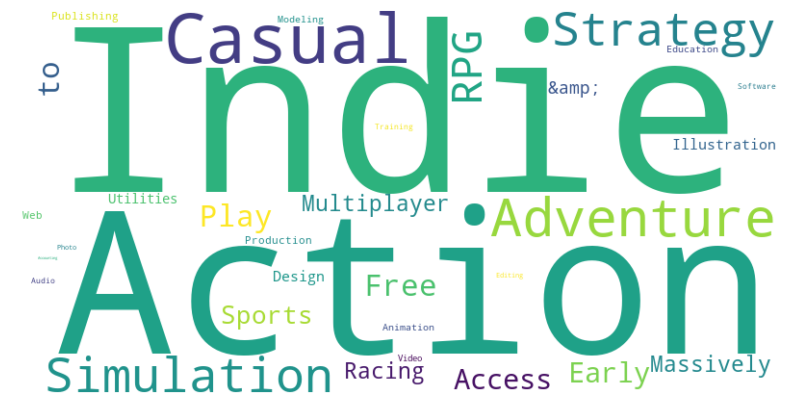

In [52]:
from collections import Counter
filtered_genres = dfoutput['genres'].dropna()

# Tratamos las listas
genres_text = ' '.join(filtered_genres.apply(lambda x: ' '.join(map(str, x))))

# Calcula las frecuencias de palabras.
word_frequencies = Counter(genres_text.split())

# Crea una instancia de WordCloud con las opciones deseadas.
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Muestra la nube de palabras utilizando matplotlib.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


En el paso siguiente guardamos el dataframe en CSV para poder usarlo posteriormente.

In [44]:
dfoutput.to_csv('output90p.csv')